# Project: Applying Data Mining in Breast Cancer Wisconsin Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Explor Data</a></li>
<li><a href="#HC">Hierarchical Clustering</a></li>
<li><a href="#K-Medoids">K-Medoids</a></li>
</ul>

<a id='intro'></a>
## Introduction

  I choose Breast Cancer Wisconsin Dataset to **apply Clustering Algorithms** 
 

<a id='wrangling'></a> 
## Data Wrangling



### General Properties

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [4]:
# Load Dataset 

df=pd.read_csv('Breast Cancer Wisconsin.csv')

df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [5]:
df.shape # see shape of dataset

(569, 33)

> notes
 - Total Raws    : 569
 - Total Columns : 33

In [6]:
df.id.nunique () #check if all instance in id columns is unique 

569

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

>note
- datatype on diagnosis column need to be numeric 
- Unnamed: 32 column need to dropped 

## Cleaning

> - 1) **set id column as index of dataset.**

In [8]:
df.set_index('id',inplace =True) 

df.head(1) #check data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,NaN


> - 2) **change values in diagnosis column to 0 , 1**

In [9]:
diagnosis_map={'M':1,'B':0} 

df['diagnosis']=df['diagnosis'].map(diagnosis_map) # maping values in diagnosis

df.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,NaN


> - **3) drop Unnamed: 32 column**

In [10]:
df.drop(['Unnamed: 32'],axis=1,inplace=True) #drop column 
df.head(1)          

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


> ***note:***
  - **we will work with columns 1:11 because the rest of the columns is the std and worst (mean of the three largest values) of       these features**  

In [11]:
features=list(df.columns[0:11]) #slice the wanted columns
X=df.loc[:,features]

X.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,,
842302,1,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871


> - **4) drop labels*** 

In [12]:
X.drop('diagnosis',axis=1,inplace=True)

X.head(1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
842302,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871


<a id='eda'></a>
## Explor Data  

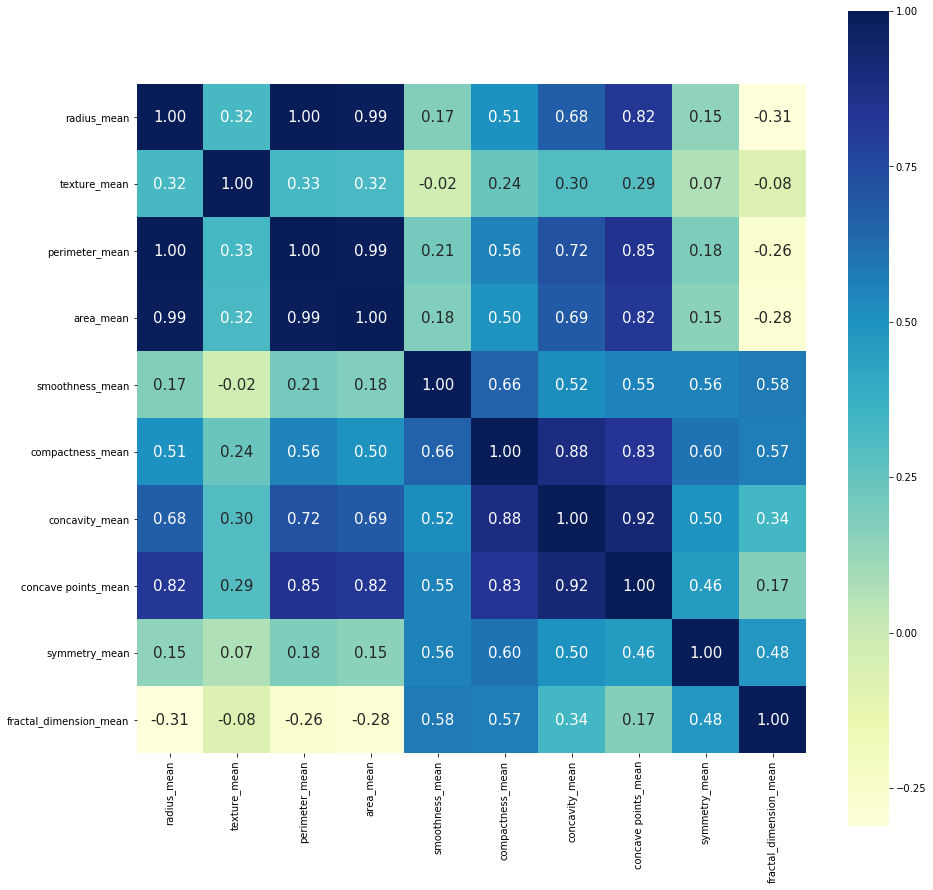

In [13]:
corr=X.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= X.columns, yticklabels= X.columns,
           cmap= 'YlGnBu') 

- ***radius_mean, perimeter_mean, area_mean is high corrlated***
- ***texture_mean =>not dependent on  all***
- ***symmetry_mean =>not dependent on  all***
- ***concavity_mean, concave points_mean , compactness_mean is high corrlated***

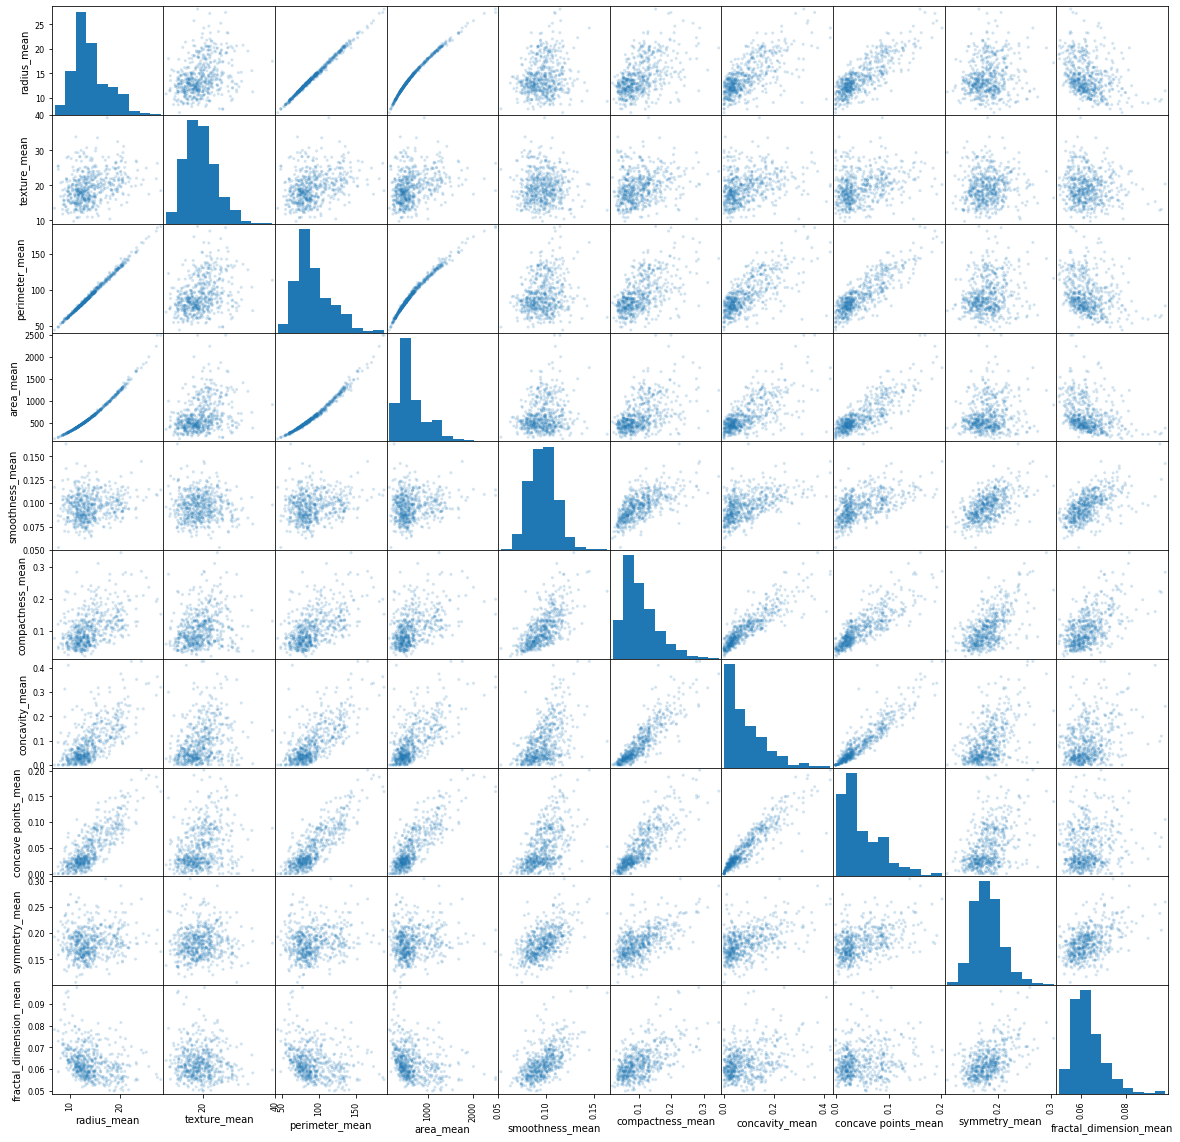

In [14]:
pd.plotting.scatter_matrix(X,figsize=(20,20),alpha=0.2, grid=True); #plot scatter matrix 

**we can see in scatter graph of:**
- **radius_mean with concvity_mean can ues to apply Clustering algorithms depends on those columns**
- **radius_mean with smoothness_mean**
- **radius_mean with symmetry_mean**
- **perimeter and texture_mean and i will use it..**

**after those 2 plots  i will use *(texture_mean, perimeter_mean)*columns in my Clustering Algorithms**

In [15]:
data = df.loc[:,["perimeter_mean","texture_mean"]] #data is pandas DataFrame with 2 columns and 569 instance

<a id='HC'></a> 
# Hierarchical clustering 

In [16]:
#scaling dataset to be more useful in our models

data_scaled = StandardScaler().fit_transform(data) 

In [17]:
data_scaled.shape #check shape of data

(569, 2)

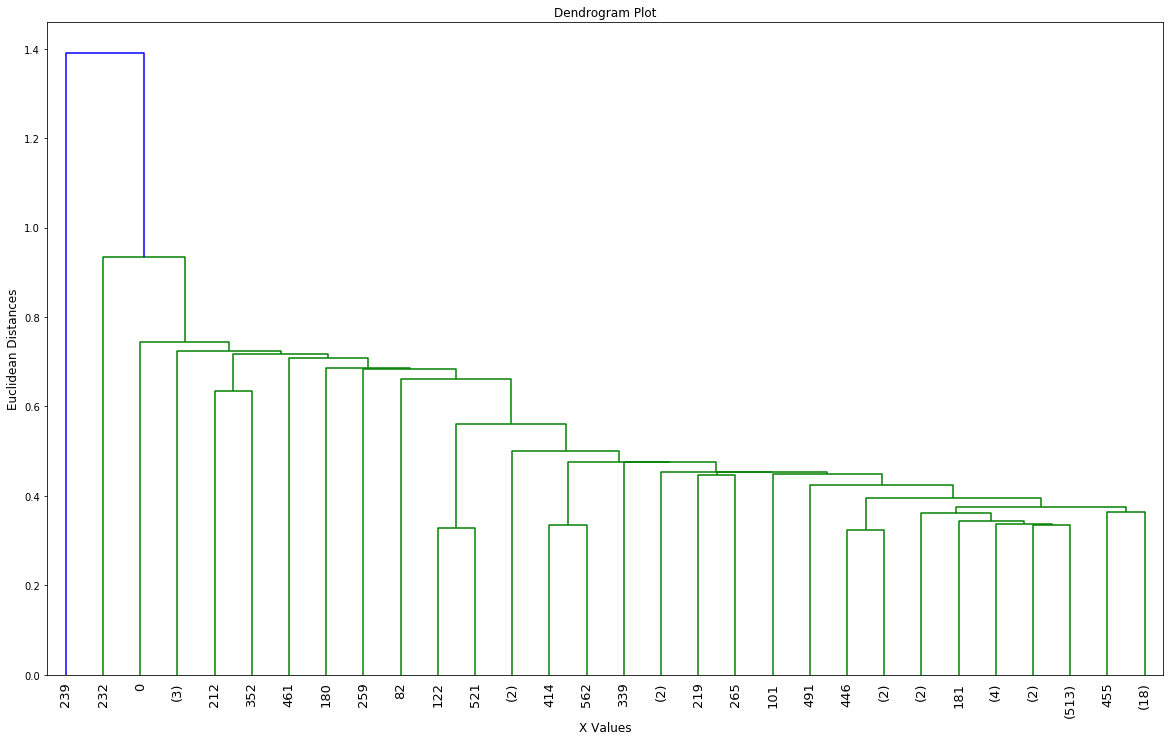

In [18]:
# plot Dendrogram 

plt.figure(figsize=(20,12)) 
dendrogram= sch.dendrogram(sch.linkage(data_scaled,'single'),leaf_rotation=90.,
      leaf_font_size=13.,truncate_mode = 'lastp')
plt.title('Dendrogram Plot',fontsize=12)
plt.xlabel('X Values',fontsize=12)
plt.ylabel('Euclidean Distances',fontsize=12)
plt.show()

**notice from dendrogram that we will devided data to 2 columns, and thas is make sence where data has 2 labels.**

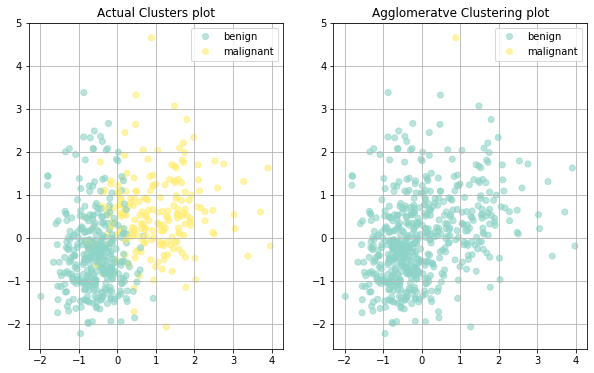

In [19]:
#create object from Agglomerative Clustering class
Agglomerative = AgglomerativeClustering(n_clusters=2 , affinity='euclidean',
                                        linkage='single') #try to  change linkage to ward to see better clusters
Agglomerative.fit_predict(data_scaled) 

# plot clusters
figure ,(axis1 , axis2) = plt.subplots(1, 2,figsize=(10,6))
classes=['benign','malignant']

plt.title('Breast Cancer Clusters')

scatter1=axis1.scatter(data_scaled[:,0], data_scaled[:,1], c=df["diagnosis"], alpha=0.6 ,cmap='Set3') # plot actual data labels 

axis1.set_title("Actual Clusters plot")

scatter2=axis2.scatter(data_scaled[:,0], data_scaled[:,1], c=Agglomerative.labels_, alpha=0.6 , cmap='Set3') #plot clusters 

axis2.set_title("Agglomeratve Clustering plot")

axis1.legend(handles= scatter1.legend_elements()[0], labels=classes)
axis2.legend(handles= scatter2.legend_elements()[0], labels=classes)
axis1.grid(True)
axis2.grid(True)

<a id='K-Medoids'></a> 
# K-Medoids

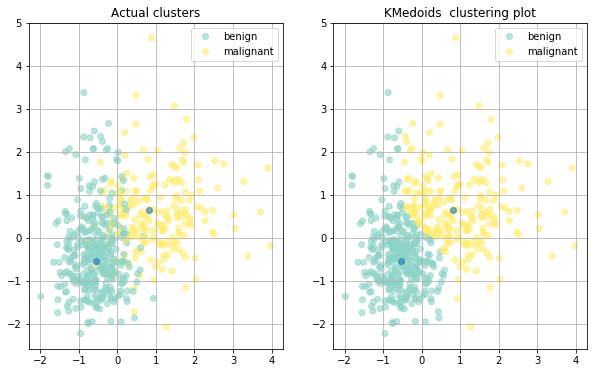

In [20]:
from sklearn_extra.cluster import KMedoids
#create object from KMedoids class
KMedoid = KMedoids(n_clusters=2, metric="manhattan",init='heuristic')
KMedoid.fit_predict(data_scaled)  
centroids = KMedoid.cluster_centers_

# plot clusters
figure, (axis1, axis2) = plt.subplots(1, 2, figsize=(10,6))
scatter1=axis1.scatter(data_scaled[:,0], data_scaled[:,1], c=df["diagnosis"], alpha=0.6,cmap='Set3')
axis1.scatter(centroids[:,0], centroids[:,1], alpha=0.6,cmap='Set3')

axis1.set_title("Actual clusters")

scatter2=axis2.scatter(data_scaled[:,0], data_scaled[:,1], c=KMedoid.labels_, alpha=0.6,cmap='Set3')
axis2.scatter(centroids[:,0], centroids[:,1], alpha=0.6,cmap='Set3')

axis2.set_title("KMedoids  clustering plot")


axis1.legend(handles= scatter1.legend_elements()[0], labels=classes)
axis2.legend(handles= scatter2.legend_elements()[0], labels=classes)
axis1.grid(True)
axis2.grid(True)


In [21]:
# to calculate accuracy of each algorithm 
def accuracy (algorithm):
    if algorithm =='agglomeratve':
        df['Agglomeratve']=Agglomerative.labels_ #initialize new column of predicted labels 
        
        compare=df['diagnosis']==df['Agglomeratve'] #compare predicted labels with actual labels
        #calculate numbers of true and false 
        true_sum=(compare.values==True).sum()
        
        false_sum=(compare.values==False).sum()
        
        return (true_sum/(true_sum+false_sum))*100
    
    elif algorithm =='kmedoids':
        df['K-Medoids']=KMedoid.labels_#initialize new column of predicted labels 
        
        compare=df['diagnosis']==df['K-Medoids'] #compare predicted labels with actual labels
        #calculate numbers of true and false 
        true_sum=(compare.values==True).sum()
        
        false_sum=(compare.values==False).sum()
        
        return (true_sum/(true_sum+false_sum))*100
        
    

In [22]:
# print accuracy 
print("the Accuracy of  Agglomerative Clustering is {:.2f}% \n".format(accuracy ('agglomeratve')))

print("the Accuracy of  K-Medoids Clustering is {:.2f}% ".format(accuracy ('kmedoids')))

the Accuracy of  Agglomerative Clustering is 62.92% 

the Accuracy of  K-Medoids Clustering is 89.81% 
